In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [0]:
data = pd.read_csv("/content/train[1].csv")

In [116]:
data.corr()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,...,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
number_of_elements,1.000000,-0.141923,-0.353064,-0.292969,-0.454525,0.939304,0.881845,0.682777,-0.320293,0.513998,0.546391,0.167451,0.484445,0.024229,0.424152,0.973195,0.719209,0.781227,0.329624,0.674005,0.717831,-0.001389,-0.422144,-0.240444,-0.518256,0.972245,0.904121,0.768060,-0.371350,0.624810,0.695089,-0.418675,-0.507895,-0.630504,-0.649882,0.871832,0.767078,0.413486,-0.355389,0.210724,...,0.195608,-0.356067,-0.052884,0.877304,0.625798,0.531540,0.241411,0.423738,0.480813,-0.437624,-0.449272,-0.514252,-0.519109,0.900759,0.860479,0.005734,-0.371788,-0.113361,-0.074796,0.227656,0.206069,-0.485324,-0.469206,0.501871,0.207065,0.696060,0.316772,0.602018,0.665580,-0.609412,-0.648551,-0.618512,-0.659268,0.967832,0.892559,0.231874,-0.447770,0.105365,0.035216,0.601069
mean_atomic_mass,-0.141923,1.000000,0.815977,0.940298,0.745841,-0.104000,-0.097609,0.125659,0.446225,0.196460,0.130675,-0.285782,-0.222097,-0.240565,-0.219381,-0.166935,-0.163565,-0.255628,-0.080545,-0.276561,-0.222812,0.497664,0.376760,0.561061,0.359894,-0.140034,-0.147604,-0.270695,0.141100,-0.326403,-0.280440,0.756861,0.608935,0.596485,0.525588,-0.043416,0.026325,0.198067,0.342391,0.245042,...,0.061103,0.189282,0.134382,-0.091539,-0.107651,-0.187069,0.010235,-0.164960,-0.133101,-0.137669,-0.135429,0.014818,-0.043003,-0.008499,-0.028541,-0.347582,-0.167528,-0.337969,-0.335778,-0.158266,-0.065989,0.006004,0.056394,-0.100077,-0.098221,-0.114538,-0.027790,-0.110658,-0.110856,0.374099,0.304683,0.392153,0.321399,-0.156786,-0.145610,-0.107450,0.168633,-0.080279,-0.081253,-0.113523
wtd_mean_atomic_mass,-0.353064,0.815977,1.000000,0.848242,0.964085,-0.308046,-0.412666,-0.144029,0.716623,-0.060739,-0.089471,-0.209296,-0.522595,-0.109490,-0.508109,-0.369773,-0.129779,-0.452303,-0.420457,-0.459323,-0.492250,0.288451,0.660011,0.468457,0.667112,-0.345071,-0.400483,-0.524861,0.363882,-0.551141,-0.554820,0.749261,0.842665,0.712815,0.767011,-0.246377,-0.195894,-0.002868,0.585687,0.103157,...,-0.096427,0.272261,0.021877,-0.290220,-0.093796,-0.225890,-0.204480,-0.197729,-0.210757,0.006730,0.014681,0.164239,0.120044,-0.225287,-0.237218,-0.283420,-0.070411,-0.253911,-0.272806,-0.236418,-0.058075,0.184990,0.250226,-0.076936,0.025638,-0.376573,-0.108512,-0.362512,-0.350993,0.534450,0.545587,0.539780,0.548981,-0.375718,-0.331025,-0.039155,0.330904,-0.003681,0.077323,-0.312272
gmean_atomic_mass,-0.292969,0.940298,0.848242,1.000000,0.856975,-0.190214,-0.232

In [117]:
data.shape

(21263, 82)

In [0]:
features = data.drop("critical_temp",axis = 1).copy()

In [119]:
print("features shape:",features.shape)
print("taarget shape:",target.shape)

features shape: (21263, 81)
taarget shape: (1, 21263)


In [0]:
new_features = features


In [0]:
target = data["critical_temp"]

In [0]:
target = np.array(target)
target = np.reshape(target,(1,len(target)))


In [0]:
for i in range(0,len(features.T)):
  new_features.T[i] = features.T[i]**(i+1)

In [0]:
features = np.array(features)
target = np.array(target)

In [0]:
features = features.astype("float32")/features.max()
target = target.astype("float32")/target.max()

In [0]:
def curve(m,x,c):
  return np.dot(m,x.T) +c

In [0]:
def error(m,x,c,y):
  return np.mean(curve(m,x,c) - y)**2


In [0]:
def slopes(m,x,c,y):
  return 2* np.mean(np.multiply((curve(m,x,c) - y),x.T),axis = 1)

In [0]:
def intercepts(m,x,c,y):
  return 2*np.mean(curve(m,x,c) - y)

In [0]:
m = np.random.randn(1,81)
c= random.random()

In [131]:
slopes(m,features,c,target)

array([2.62972013e-04, 7.35149211e-03, 6.73496784e-03, 6.40070954e-03,
       5.91249397e-03, 7.75180479e-05, 6.68883408e-05, 7.14313386e-03,
       3.22998223e-03, 2.88963405e-03, 2.61847464e-03, 5.74616317e-02,
       6.15866059e-02, 5.58566109e-02, 5.98702973e-02, 8.56630500e-05,
       6.33697315e-05, 3.06948976e-02, 3.13156362e-02, 1.19811905e-02,
       1.17059152e-02, 1.22222575e-02, 1.12532303e-02, 1.15564653e-02,
       1.06089580e-02, 8.39667300e-05, 7.11637743e-05, 7.69979786e-03,
       4.76896751e-03, 2.98710112e-03, 2.90519521e-03, 5.71728783e-01,
       5.38063048e-01, 4.35908353e-01, 4.25840999e-01, 7.37092500e-05,
       5.84552891e-05, 5.83428016e-01, 2.84268041e-01, 2.42875190e-01,
       2.25006792e-01, 6.03127973e-03, 6.67283324e-03, 4.66955511e-03,
       5.51081893e-03, 7.14234571e-05, 5.39144374e-05, 7.86811201e-03,
       4.03886927e-03, 3.28590940e-03, 2.92439751e-03, 1.33780279e-03,
       1.37296755e-03, 1.06432198e-03, 1.13329058e-03, 7.28358574e-05,
      

In [132]:
(curve(m,features,c).shape)

(1, 21263)

In [0]:
def acc_pred(error,y):
    arrow= error(m,features,c,target)/np.mean(target**2)*100
    return 100- arrow


iterations: 99
error: 0.0013130790828620922
accuracy: 98.09424432652118


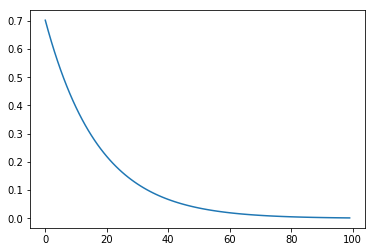

In [134]:
from IPython.display import clear_output
cost = []
lr = 0.01
iterations =100
for i in range(iterations):
  m = m - lr*slopes(m,features,c,target)
  c= c- lr*intercepts(m,features,c,target)
  cost.append(error(m,features,c,target))
  clear_output(True)
  print("iterations:",i)
  print("error:",error(m,features,c,target))
  print("accuracy:",acc_pred(error,target))
  plt.plot(cost)
  plt.show()
  